<a href="https://colab.research.google.com/github/shabnm/autoencoder/blob/master/multilayer_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.models import Model
from keras.layers import Input, Dense

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Load the data from mnist dataset and normalize and reshape it

In [34]:
(X_train,_),(X_test,_) = mnist.load_data()

In [10]:
X_train.shape[:]

(60000, 28, 28)

In [35]:
X_train = X_train.astype('float32')/255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.astype('float32')/255
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [50]:
from keras import regularizers

In [51]:
bottleneck_dim = 64
hidden_size = 128
input_img = Input(shape=(np.prod(X_train.shape[1:]),))

hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(bottleneck_dim, activation='relu',activity_regularizer=regularizers.l1(10e-5))(hidden_1)

hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(np.prod(X_train.shape[1:]), activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, decoded)

compile the autoencoder with optimizer adadelta(improved SGD and extension of adagrad)

In [52]:
autoencoder.compile(optimizer='adadelta',loss='mse')

In [53]:
autoencoder.fit(X_train,X_train, epochs=20, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2280 - val_loss: 0.2140
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1867 - val_loss: 0.1431
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1033 - val_loss: 0.0805
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0746 - val_loss: 0.0717
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0703 - val_loss: 0.0697
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0690 - val_loss: 0.0689
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0684 - val_loss: 0.0685
Epoch 8/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0681 - val_loss: 0.0683
Epoch 9/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0680 - val_loss: 0.0681
Epoch

In [54]:
img = autoencoder.predict(X_test)

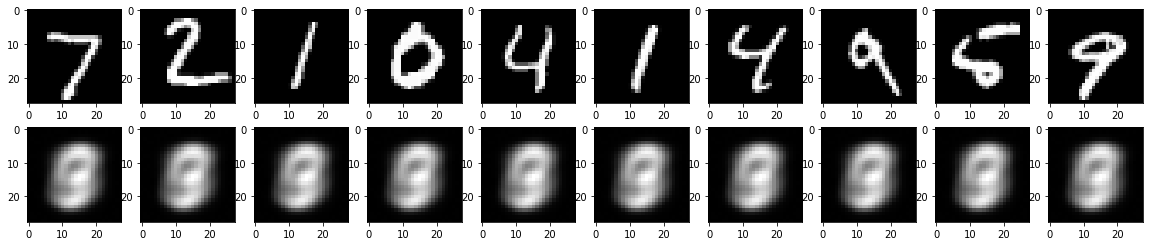

In [55]:
n =10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(img[i].reshape(28,28))
  plt.gray()


plt.show()


Used for data denoising and dimensionality reduction